In [28]:
# Load Library

packages <- c("dplyr", "haven","ggplot2","MASS", "randomForest", "caret", "ranger", "parallel")

install_if_missing <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
  }
  library(pkg, character.only = TRUE)
}

lapply(packages, install_if_missing)

select <- dplyr::select

[[1]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[2]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[3]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[4]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[5]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[6]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[7]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[8]]
 [1] "parallel"     "ranger"       "caret"        "lattice"      "randomForest"
 [6] "MASS"         "ggplot2"      "haven"        "dplyr"        "stats"       
[11] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[16] "base"

In [6]:
#Filter the BMI<25

In [7]:
df1 <- read.csv("Data/merge_df_cln.csv") %>% 
  filter(cc_bmi == "<25") %>% 
  select("bp_sys_mean","DRXTPROT", "DRXTCARB", "DRXTTFAT", "DRXTSFAT", "DRXTMFAT", "DRXTPFAT", "DRXTCHOL", "DRXTFIBE", 
"DRXTVB6", "DRXTVB12", "DRXTFOLA", "DRXTVC", "DRXTCALC", "DRXTPHOS", "DRXTMAGN", "DRXTIRON", 
"DRXTZINC", "DRXTCOPP", "DRDTSODI", "DRXTPOTA", "DRXTSELE", "DRXTCAFF", "DRXTTHEO", "DRXTALCO", 
 "DRXTS040", "DRXTS060", "DRXTS080", "DRXTS100", "DRXTS120", "DRXTS140", "DRXTS160", 
"DRXTS180", "DRXTM161", "DRXTM181", "DRXTM201", "DRXTM221", "DRXTP182", "DRXTP183", "DRXTP184", 
"DRXTP204", "DRXTP205", "DRXTP225", "DRXTP226", "DRD320GW"
) 
head(df1)

,bp_sys_mean,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.6667,123.16,350.37,71.95,24.34,26.48,11.94,313.95,36.99,2.90,⋯,0.09,0.02,10.07,1.14,0,0.26,0.00,0.01,0.02,0.00
2,114.6667,24.63,202.11,25.15,7.78,7.84,7.15,38.45,6.24,0.97,⋯,0.05,0.01,6.41,0.69,0,0.03,0.00,0.00,0.00,1711.00
3,147.3333,39.62,112.24,33.87,18.61,10.18,2.37,124.95,16.36,0.77,⋯,0.00,0.00,1.86,0.49,0,0.02,0.00,0.00,0.00,236.00
4,94.0000,99.84,334.43,136.90,49.38,55.83,23.51,292.98,14.21,1.69,⋯,0.24,0.01,21.10,2.10,0,0.13,0.01,0.02,0.04,1652.00
5,128.0000,20.03,120.16,32.94,16.95,10.38,3.71,96.73,3.48,0.21,⋯,0.03,0.00,3.08,0.53,0,0.00,0.00,0.00,0.00,663.75
6,110.6667,71.13,279.65,133.93,35.73,52.33,37.34,293.94,18.41,1.90,⋯,0.24,0.00,32.66,4.27,0,0.18,0.01,0.03,0.06,1622.50


In [15]:
# Calculate the R_squred

In [16]:
options(scipen = 999)
cordf1 <- data.frame(Variable = setdiff(names(df1), "bp_sys_mean"))
cordf1$r_squared <- sapply(cordf1$Variable,
                          function(var) 

cor(df1[[var]],df1$bp_sys_mean)^2)

cordf1 <- cordf1[order(-cordf1$r_squared), ]

print(cordf1)

   Variable     r_squared
2  DRXTCARB 0.00910158833
3  DRXTTFAT 0.00737035084
5  DRXTMFAT 0.00718538263
31 DRXTS160 0.00709354287
4  DRXTSFAT 0.00703898941
34 DRXTM181 0.00686625396
13 DRXTCALC 0.00685780791
19 DRDTSODI 0.00672854238
32 DRXTS180 0.00648933311
14 DRXTPHOS 0.00633526695
1  DRXTPROT 0.00575091472
30 DRXTS140 0.00554463266
25 DRXTS040 0.00494643088
44 DRD320GW 0.00447074330
37 DRXTP182 0.00432107794
33 DRXTM161 0.00423273915
6  DRXTPFAT 0.00403281967
28 DRXTS100 0.00333260642
26 DRXTS060 0.00312955454
17 DRXTZINC 0.00278606802
21 DRXTSELE 0.00278286456
15 DRXTMAGN 0.00241113941
27 DRXTS080 0.00237413029
16 DRXTIRON 0.00218036868
11 DRXTFOLA 0.00199145670
23 DRXTTHEO 0.00180236289
38 DRXTP183 0.00147132750
24 DRXTALCO 0.00118289724
9   DRXTVB6 0.00114378880
35 DRXTM201 0.00099911878
20 DRXTPOTA 0.00094606932
18 DRXTCOPP 0.00073643298
8  DRXTFIBE 0.00062395547
29 DRXTS120 0.00062358531
7  DRXTCHOL 0.00050171473
12   DRXTVC 0.00046054116
40 DRXTP204 0.00025537308
43 DRXTP226 

In [17]:
# Use forward selection method

In [18]:
fit_model_df1 <- function(response, predictors, data) {
  models <- list()
  formula_str <- response 
  for (i in seq_along(predictors)) {
    formula_str <- paste(formula_str, "+", predictors[i]) 
    models[[i]] <- lm(as.formula(paste("bp_sys_mean ~", paste(predictors[1:i], collapse = " + "))), data = data)
  }
  
  return(models)
}
sort_vars <- cordf1$Variable
df1_models <- fit_model_df1(response = "bp_sys_mean", predictors = sort_vars, data = df1)


In [19]:
# Use AIC to select the model

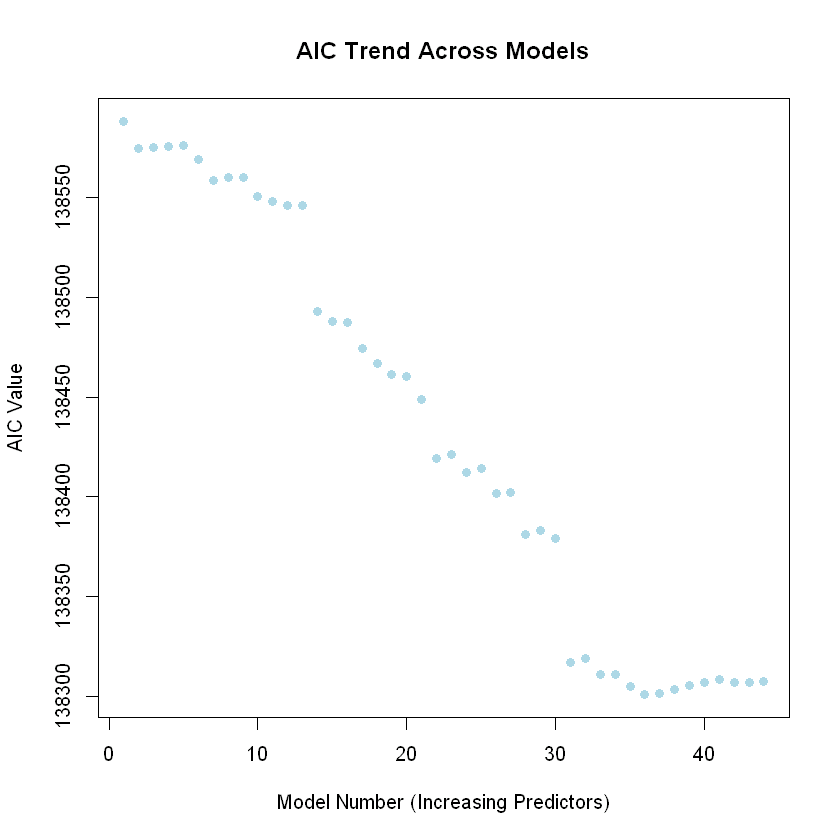

In [20]:
df1_models_aic <- sapply(df1_models, AIC)
model_nums <- seq_along(df1_models_aic)

plot(model_nums, df1_models_aic, pch = 19, col = "lightblue",
     xlab = "Model Number (Increasing Predictors)", 
     ylab = "AIC Value",
     main = "AIC Trend Across Models")

In [21]:
# Stepwise Model 

In [25]:
library(MASS)
full_model <- lm(bp_sys_mean ~ ., data = df1)
best_model <- stepAIC(full_model, direction = "both", trace = FALSE)  

In [28]:
sqrt(mean(resid(best_model)^2))

[1] 19.22983

# Maching Learning

In [34]:
df1 <- read.csv("Data/merge_df_cln.csv")
colnames(df1)
df1 <- df1 %>% 
        mutate(hyper = ifelse((bp_sys_mean >= 140 | bp_dia_mean >= 90), 1 , 0)) %>% 
        dplyr::select(-"svy_id", -"bp_sys_mean", -"bp_dia_mean")
df1$hyper <- as.factor(df1$hyper)
summary(df1$hyper)

[1] "X"               "svy_id"          "svy_year"        "demo_age_cat"   
 [5] "demo_race"       "demo_race_black" "demo_age_years"  "demo_pregnant"  
 [9] "demo_gender"     "bp_sys_mean"     "bp_dia_mean"     "cc_bmi"         
[13] "DRXTPROT"        "DRXTCARB"        "DRXTTFAT"        "DRXTSFAT"       
[17] "DRXTMFAT"        "DRXTPFAT"        "DRXTCHOL"        "DRXTFIBE"       
[21] "DRXTVB6"         "DRXTVB12"        "DRXTFOLA"        "DRXTVC"         
[25] "DRXTCALC"        "DRXTPHOS"        "DRXTMAGN"        "DRXTIRON"       
[29] "DRXTZINC"        "DRXTCOPP"        "DRDTSODI"        "DRXTPOTA"       
[33] "DRXTSELE"        "DRXTCAFF"        "DRXTTHEO"        "DRXTALCO"       
[37] "DRXTMOIS"        "DRXTS040"        "DRXTS060"        "DRXTS080"       
[41] "DRXTS100"        "DRXTS120"        "DRXTS140"        "DRXTS160"       
[45] "DRXTS180"        "DRXTM161"        "DRXTM181"        "DRXTM201"       
[49] "DRXTM221"        "DRXTP182"        "DRXTP183"        "DRXTP184"       
[53] "DRXTP204"        "DRXTP205"        "DRXTP225"        "DRXTP226"       
[57] "DRD320GW"

0     1 
40565  9998

In [35]:
# Split into training (70%) and testing (30%) sets
set.seed(42)
train_index <- createDataPartition(df1$hyper, p = 0.7, list = FALSE)
train_data <- df1[train_index, ]
test_data <- df1[-train_index, ]

train_data$hyper <- as.factor(train_data$hyper)
test_data$hyper <- as.factor(test_data$hyper)

In [ ]:
# Check available CPU cores
num_cores <- detectCores()
print(paste("Using", num_cores, "cores"))

# Train Random Forest classification model with multi-threading
rf_model <- ranger(hyper ~ ., data = train_data, 
                   num.trees = 500, 
                   mtry = sqrt(ncol(train_data) - 1), 
                   importance = "impurity",
                   probability = TRUE,  # Enables probability prediction
                   num.threads = num_cores)

# Predict class probabilities on the test set
predictions <- predict(rf_model, test_data)$predictions

# Convert probabilities to class labels
predicted_class <- ifelse(predictions[,2] > 0.5, "1", "0")  # Threshold at 0.5
predicted_class <- factor(predicted_class, levels = levels(test_data$hyper))

# Model Evaluation
conf_matrix <- confusionMatrix(predicted_class, test_data$hyper)

# Print Accuracy, Sensitivity, Specificity
print(conf_matrix)

# Variable Importance Plot
importance_values <- rf_model$variable.importance
print(importance_values)
varImpPlot(rf_model)

[1] "Using 16 cores"
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 12001  2776
         1   168   223
                                          
               Accuracy : 0.8059          
                 95% CI : (0.7995, 0.8122)
    No Information Rate : 0.8023          
    P-Value [Acc > NIR] : 0.1332          
                                          
                  Kappa : 0.0901          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.98619         
            Specificity : 0.07436         
         Pos Pred Value : 0.81214         
         Neg Pred Value : 0.57033         
             Prevalence : 0.80228         
         Detection Rate : 0.79121         
   Detection Prevalence : 0.97422         
      Balanced Accuracy : 0.53028         
                                          
       'Positive' Class : 0             

ERROR: Error in varImpPlot(rf_model): This function only works for objects of class `randomForest'
